In [13]:
import pandas as pd 
import numpy as np 

In [18]:
df = pd.read_csv(r'C:\Users\visha\OneDrive\Scaler Academy\Datasets\Housing.csv')

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [20]:
df['mainroad'] = df['mainroad'].map({'yes': 1, "no": 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, "no": 0})
df['basement'] = df['basement'].map({'yes': 1, "no": 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, "no": 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, "no": 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, "no": 0})

In [21]:
status = pd.get_dummies(df['furnishingstatus'], drop_first=True)
df.drop(['furnishingstatus'], axis = 1, inplace = True)
df = pd.concat([df, status], axis = 1)
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [22]:
df.furnishingstatus.value_counts()

AttributeError: 'DataFrame' object has no attribute 'furnishingstatus'

In [10]:
# Drop 'furnishingstatus' as we have created the dummies for it


In [11]:
housing['areaperbedroom'] = housing['area']/ housing['bedrooms']

In [12]:
housing['bbratio'] = housing['bathrooms']/ housing['bedrooms']

In [13]:
def normalize(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))

# applying normalization to all columns
housing = housing.apply(normalize)

In [14]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


In [15]:
X = housing.drop(columns=['price'], axis=1)
y = housing['price']

In [17]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
rf = RFE(lm, n_features_to_select = 9)

In [21]:
rf.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=9)

In [23]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished', 'areaperbedroom', 'bbratio'],
      dtype='object')

In [22]:
print(rf.support_)

[ True False  True  True  True False False  True  True False  True False
 False  True  True]


In [24]:
col = X_train.columns[rf.support_]

In [25]:
col

Index(['area', 'bathrooms', 'stories', 'mainroad', 'hotwaterheating',
       'airconditioning', 'prefarea', 'areaperbedroom', 'bbratio'],
      dtype='object')

In [26]:
# These are the top 9 features elected by RFE 
# Next steps, build model and check score, also check assumptions 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [28]:
elec_cons = pd.read_csv("total-electricity-consumption-us.csv",  sep = ',', header= 0 )
elec_cons.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [29]:
elec_cons.shape

(51, 2)

In [30]:
# there are no missing values in the dataset
elec_cons.isnull().values.any()

False

In [31]:
size = len(elec_cons.index)
index = range(0, size, 5)

train = elec_cons[~elec_cons.index.isin(index)]
test = elec_cons[elec_cons.index.isin(index)]

In [32]:
print(len(train))
print(len(test))

40
11


In [33]:
# converting X to a two dimensional array, as required by the learning algorithm
X_train = train.Year.values.reshape(-1,1) #Making X two dimensional
y_train = train.Consumption

X_test = test.Year.values.reshape(-1,1) #Making X two dimensional
y_test = test.Consumption

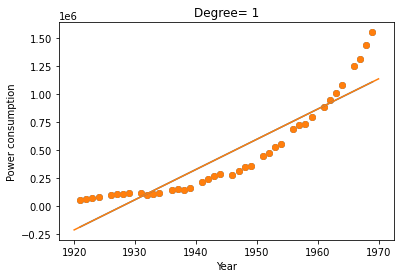

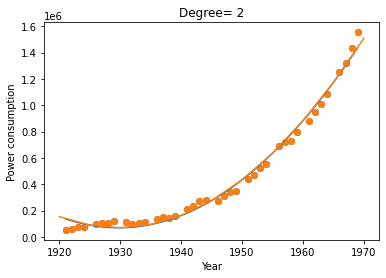

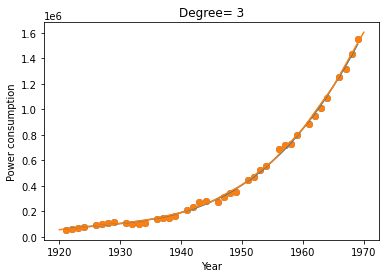

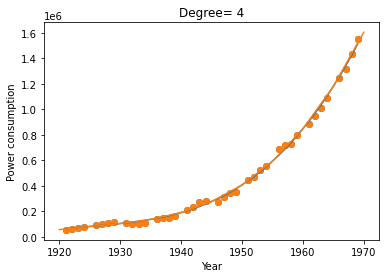

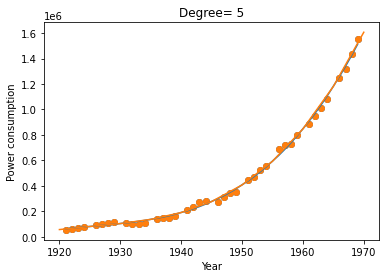

In [37]:
r2_train = []
r2_test = []
degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                     ('model', LinearRegression())])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2_test.append(metrics.r2_score(y_test, y_pred))
    
    # training performance
    y_pred_train = pipeline.predict(X_train)
    r2_train.append(metrics.r2_score(y_train, y_pred_train))
    
# plot predictions and actual values against year
    fig, ax = plt.subplots()
    ax.set_xlabel("Year")                                
    ax.set_ylabel("Power consumption")
    ax.set_title("Degree= " + str(degree))
    
    # train data in blue
    ax.scatter(X_train, y_train)
    ax.plot(X_train, y_pred_train)
    
    # test data
    ax.scatter(X_train, y_train)
    ax.plot(X_test, y_pred)
    
    plt.show()

In [38]:
r2_train

[0.8423747402176137,
 0.990889674455328,
 0.9979789884378975,
 0.9979839891375542,
 0.9979886835885011]

In [39]:
r2_test

[0.816517046382681,
 0.9876080502746136,
 0.9984899918575911,
 0.9985021892870695,
 0.9985137010298346]

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [41]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished', 'areaperbedroom', 'bbratio'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [43]:
X_train.shape

(381, 15)

In [49]:
ml1 = Ridge(alpha=10)

In [45]:
ml1.fit(X_train,y_train)

Ridge()

In [46]:
ml1.score(X_train, y_train)

0.6857706476881045

In [47]:
ml1.coef_

array([ 0.08078987, -0.0067977 ,  0.03997406,  0.02953929,  0.01781688,
        0.01014868,  0.00994153,  0.01821186,  0.03081102,  0.01630556,
        0.02411346, -0.00030635, -0.01508003, -0.03752667,  0.00746874])

In [52]:
ml1 = Ridge(alpha=100)
ml1.fit(X_train,y_train)
ml1.score(X_train, y_train)

0.6710509360323371

In [53]:
ml1.coef_

array([ 0.03305479,  0.01820285,  0.03138687,  0.02765325,  0.01676208,
        0.01197786,  0.00941326,  0.01452559,  0.02733842,  0.01743078,
        0.02249901,  0.0012788 , -0.01339159,  0.00611457,  0.01089648])

In [60]:
ml2 = Lasso(alpha=0.01)

In [61]:
ml2.fit(X_train,y_train)
ml2.score(X_train, y_train)

0.6586551593587069

In [62]:
ml2.coef_

array([ 0.04348422,  0.0046988 ,  0.04528714,  0.02580277,  0.01274586,
        0.00696221,  0.00454231,  0.00912963,  0.02562746,  0.01248867,
        0.0197347 ,  0.        , -0.00955197,  0.        ,  0.        ])

In [63]:
values = [ 0.01, 0.05, 0.1, 1, 10 , 100]

In [64]:
train_score = []
test_score = []

for i in values:
    ml1 = Ridge(alpha = i)
    ml1.fit(X_train,y_train)
    a = ml1.score(X_train, y_train)
    b = ml1.score(X_test, y_test)
    train_score. append(a)
    test_score.append(b)

In [65]:
train_score

[0.6858279256120129,
 0.6858277625246307,
 0.6858272591764281,
 0.6857706476881045,
 0.6838413639865337,
 0.6710509360323371]

In [66]:
test_score

[0.6648316588655988,
 0.664898960799101,
 0.6649818830593737,
 0.6662744923695169,
 0.6707091923818848,
 0.6628220408359187]

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
cv1 = cross_val_score(ml1, X_train, y_train, cv = 5 )

In [70]:
cv1

array([0.67271222, 0.67762987, 0.67986299, 0.65278159, 0.56858076])